In [2]:
%matplotlib inline
import cv2
import image_slicer
import matplotlib.pyplot as plt
import matplotlib

In [16]:
#1 image into 9 cropped images
tiles = image_slicer.slice('test.png', 81, save=False)
image_slicer.save_tiles(tiles, directory='.\\test')
for i in range(1, 4):
    for j in range(1, 4):
        img = cv2.bitwise_not(cv2.imread(f'./test/_0{j}_0{i}.png', 0))
        crop_top = 0
        # while True:
        #     if img[crop_top][img.shape[1]//2] == 0:
        #         break
        #     crop_top += 1
        crop_bottom = img.shape[0] - 1
        # while True:
        #     if img[crop_bottom][img.shape[1]//2] == 0:
        #         break
        #     crop_bottom -= 1
        crop_left = 0
        # while True:
        #     if img[img.shape[0]//2][crop_left] == 0:
        #         break
        #     crop_left += 1
        crop_right = img.shape[1] - 1
        # while True:
        #     if img[img.shape[0]//2][crop_right] == 0:
        #         break
        #     crop_right -= 1
        # while (crop_right - crop_left) % 3 != 0:
        #     crop_right -= 1
        #     crop_left += 1
        # while (crop_bottom - crop_top) % 3 != 0:
        #     crop_top += 1
        #     crop_bottom -= 1
        img_cropped = img[crop_top:crop_bottom, crop_left:crop_right]
        cv2.imwrite(f'{j}_{i}.png', cv2.bitwise_not(img_cropped))

In [138]:
file = cv2.imread(f'./image/_03_05.png', 0)
mask = file < 200

# mask left
mask_left = mask[:, 0:mask.shape[1]//2]
left = np.max(np.append(np.where(mask_left.all(axis=0))[0], 0))


mask_right = mask[:, mask.shape[1]//2:mask.shape[1]]
right = np.min(np.append(np.where(mask_right.all(axis=0))[0], mask.shape[1]//2)) + mask.shape[1]//2

mask_top = mask[0:mask.shape[0]//2, :]
top = np.max(np.append(np.where(mask_top.all(axis=1))[0], 0))

mask_bottom = mask[mask.shape[0]//2:mask.shape[0], :]
bottom = np.min(np.append(np.where(mask_bottom.all(axis=1))[0], mask.shape[0]//2)) + mask.shape[0]//2


file = file[top+1:bottom-1, left+1:right-1]

cv2.imwrite(f'output.png', file)


# bound even further around digit looking for first/last row/column without all white

mask = file < 200
coords = np.argwhere(mask)
if len(coords) == 0:
    cv2.imwrite(f'output.png', file)
else:
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1
    print(x0)
    print(x1)
    print(y0)
    print(y1)
    cv2.imwrite(f'output.png', file[x0:x1, y0:y1])

In [14]:
import numpy as np

#9 image into 81 cropped images
tiles = image_slicer.slice('1_1.png', 9, save=False)
image_slicer.save_tiles(tiles, directory='.\\test2')
for i in range(1, 4):
    for j in range(1, 4):
        img = cv2.bitwise_not(cv2.imread(f'./test2/_0{j}_0{i}.png', 0))
        crop_top = 0
        while True:
            print(crop_top)
            print(img[crop_top])
            print(np.all(img[crop_top]))
            if not np.all(img[crop_top]):
                crop_top += 1
                break
            crop_top += 1
        crop_bottom = img.shape[0] - 1
        while True:
            if not np.all(img[crop_bottom]):
                crop_bottom -= 1
                break
            crop_bottom -= 1
        crop_left = 0
        while True:
            if not np.all(img[:, crop_left]):
                crop_left += 1
                break
            crop_left += 1
        crop_right = img.shape[1] - 1
        while True:
            if not np.all(img[:, crop_right]):
                crop_right -= 1
                break
            crop_right -= 1
        img_cropped = img[crop_top:crop_bottom, crop_left:crop_right]
        cv2.imwrite(f's{j}_{i}.png', cv2.bitwise_not(img_cropped))

0
[  0   0   0   0   1   1   0   0   1   0   1   0   1   1   0   0   1   1
   0   0   0   1   1   1   1   0   0   1   0   1   0   0   0   1   1   0
   1   0   1   1   0   0   0   0   1   0   0   0   1   0   1   0   1   1
   0   0   0   1   0   0   0   0   0   1   1   0   0   1   0   0   1   0
   0   0   1   0   0   1   1   0   0   1   0   0   0   0   0   1   0   0
   1   0   0   1   0   1   0   0   0   0   1   0   1 177 255 255 255]
False
0
[153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 224 255 255 255]
True
1
[  0   1   0   1   0   0   0   0   0   0   0   1   0   0   1   1   1   1
   1   1   1   1   1   0   1   1   1   0

In [14]:
img_path = f'./test/_01_01.png'
img = cv2.imread(img_path, 0)
img = cv2.bitwise_not(img)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,  98, 255],
       [255, 255, 255, ...,  98, 159, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

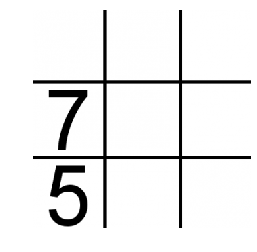

In [29]:
plt.imshow(img_cropped, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [17]:
crop

3